In [84]:
import pandas as pd

In [85]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [86]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [87]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [88]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [89]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [90]:
# Obtendo uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
103,Recife,2019-01-01,41.65,982,3
109,Salvador,2019-03-02,124.37,1035,1
11,Aracaju,2019-01-01,161.53,1520,4
101,Natal,2019-01-02,32.28,1035,3
151,Natal,2019-01-02,14.63,1035,1


In [91]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [92]:
df["LojaID"] = df["LojaID"].astype("object")

In [93]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [94]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [95]:
df["Vendas"].mean()

122.61180089485438

In [96]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [97]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [98]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.00,853,2
6,Recife,2019-01-01,16.27,981,6
78,Fortaleza,2019-01-01,37.66,1005,2
49,Natal,2019-04-01,831.00,852,2
125,Fortaleza,2019-03-02,37.60,983,4


In [99]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Cidade   Data  Vendas  LojaID   Qtde
0     False  False   False   False  False
1     False  False   False   False  False
2     False  False   False   False  False
3     False  False   False   False  False
4     False  False   False   False  False
..      ...    ...     ...     ...    ...
235   False  False   False   False  False
236   False  False   False   False  False
237   False  False   False   False  False
238   False  False   False   False  False
239   False  False   False   False  False

[894 rows x 5 columns]>

In [100]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [101]:
# Apagando as linhas com os valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [102]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**# Criando novas colunas**

In [103]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [104]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [105]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [106]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [107]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [108]:
df["Receita"].min()

3.34

In [109]:
# Descobrindo a 3 maiores receitas
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [110]:
# Descobrindo a 3 menores receitas
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [111]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [112]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [113]:
#Transformando a coluna em data do tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [114]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [115]:
df["Data"] = pd.to_datetime(df["Data"])

In [116]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [117]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [118]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [119]:
# Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year


In [120]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
57,Aracaju,2018-01-01,23.49,1520,7,164.43,7.0,2018
94,Natal,2019-01-02,33.24,1037,1,33.24,1.0,2019
3,Natal,2019-01-07,271.00,854,3,813.00,3.0,2019
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019
28,Recife,2019-01-01,123.69,983,3,371.07,3.0,2019


In [121]:
# Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [122]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
101,Salvador,2019-01-01,32.28,1035,3,96.84,3.0,2019,1,1
188,Salvador,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019,1,1
30,Recife,2019-01-01,12.35,980,5,61.75,5.0,2019,1,1
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,3.0,2019,1,1


In [123]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [124]:
# Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [125]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
74,Salvador,2019-01-01,170.53,1035,2,341.06,2.0,2019,1,1,365 days
55,Salvador,2019-01-01,36.62,1036,1,36.62,1.0,2019,1,1,365 days
87,Recife,2019-01-01,210.06,983,4,840.24,4.0,2019,1,1,365 days
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days
205,Salvador,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days


In [126]:
# Criando a coluna de trimestre
df["trimestre_vendas"] = df["Data"].dt.quarter

In [127]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
129,Natal,2019-01-02,125.66,1037,1,125.66,1.0,2019,1,2,366 days,1
171,Salvador,2019-01-02,136.45,1035,3,409.35,3.0,2019,1,2,366 days,1
154,Salvador,2019-01-02,9.58,1037,1,9.58,1.0,2019,1,2,366 days,1
226,Natal,2019-01-02,38.32,1035,2,76.64,2.0,2019,1,2,366 days,1
101,Recife,2019-01-01,172.55,983,7,1207.85,7.0,2019,1,1,365 days,1


In [128]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [129]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


**Visualizando dados**

In [130]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

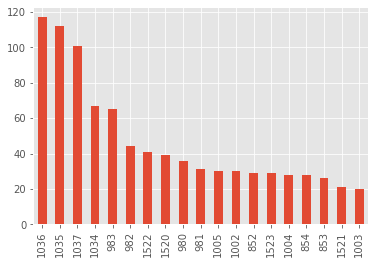

In [131]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

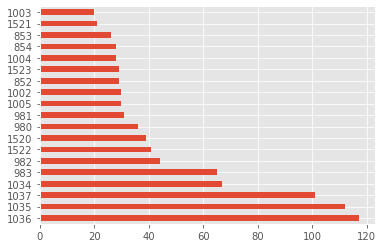

In [132]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh();

<AxesSubplot:>

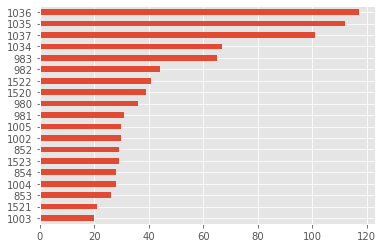

In [133]:
df["LojaID"].value_counts(ascending=True).plot.barh()

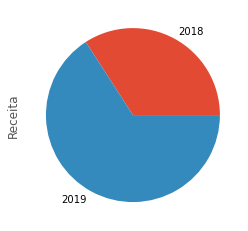

In [134]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();


TypeError: 'str' object is not callable

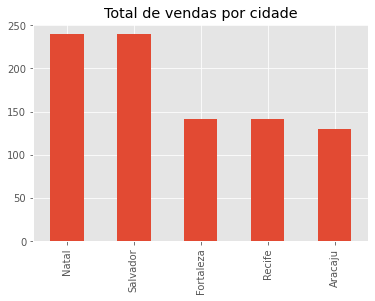

In [138]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

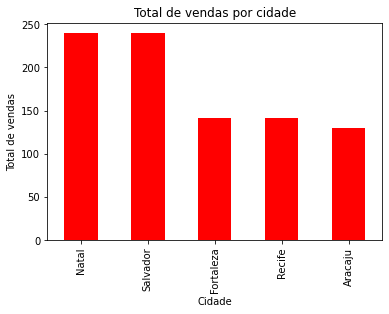

In [ ]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [136]:
# Alterando o estilo
plt.style.use("ggplot")

TypeError: 'str' object is not callable

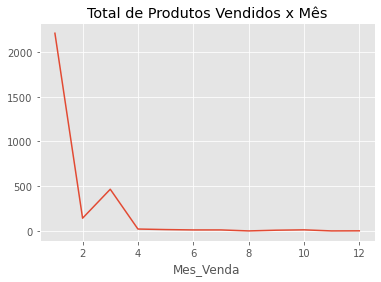

In [137]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [ ]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [ ]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

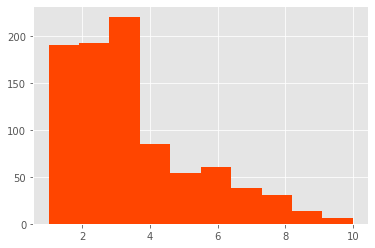

In [ ]:
# Histograma
plt.hist(df["Qtde"], color="orangered");

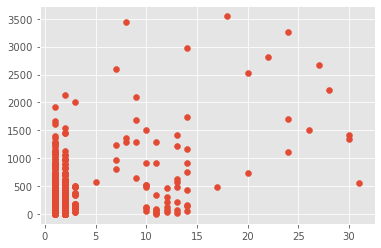

In [ ]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

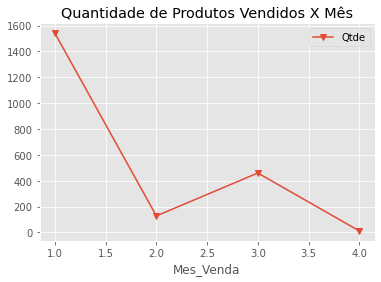

In [ ]:
# Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend()
plt.savefig("grafico qtde x mes.png")